In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

raw_path = "/boardgame-geek-dataset_organized.csv"
df_raw = pd.read_csv(raw_path)
df = df_raw.copy()
df.head()

,row_id,boardgame,release_year,min_players,max_players,min_playtime,max_playtime,minimum_age,avg_rating,num_ratings,...,rank_strategy,rank_thematic,rank_family,rank_war,rank_customizable,rank_abstract,rank_party,rank_childrens,url,description
0,1,Brass: Birmingham,2018,2,4,60,120,14,8.575,53548,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://boardgamegeek.com/boardgame/224517/bra...,"Build networks, grow industries, and navigate ..."
1,2,Pandemic Legacy: Season 1,2015,2,4,60,60,13,8.512,56071,...,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,https://boardgamegeek.com/boardgame/161936/pan...,Mutating diseases are spreading around the wor...
2,3,Ark Nova,2021,1,4,90,150,14,8.539,54528,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://boardgamegeek.com/boardgame/342942/ark...,"Plan and build a modern, scientifically manage..."
3,4,Gloomhaven,2017,1,4,60,120,14,8.557,65443,...,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,https://boardgamegeek.com/boardgame/174430/glo...,Vanquish monsters with strategic cardplay. Ful...
4,5,Twilight Imperium: Fourth Edition,2017,3,6,240,480,14,8.572,26686,...,5.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,https://boardgamegeek.com/boardgame/233078/twi...,"Build an intergalactic empire through trade, r..."


In [ ]:
plt.style.use('seaborn-v0_8-darkgrid')
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 57 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   row_id             2000 non-null   int64  
 1   boardgame          2000 non-null   object 
 2   release_year       2000 non-null   int64  
 3   min_players        2000 non-null   int64  
 4   max_players        2000 non-null   int64  
 5   min_playtime       2000 non-null   int64  
 6   max_playtime       2000 non-null   int64  
 7   minimum_age        2000 non-null   int64  
 8   avg_rating         2000 non-null   float64
 9   num_ratings        2000 non-null   int64  
 10  complexity         2000 non-null   float64
 11  rank_overall       2000 non-null   int64  
 12  owned              2000 non-null   int64  
 13  wishlisted         2000 non-null   int64  
 14  total_plays        2000 non-null   int64  
 15  fans               2000 non-null   int64  
 16  page_views         2000 

In [ ]:
df.describe()

,row_id,release_year,min_players,max_players,min_playtime,max_playtime,minimum_age,avg_rating,num_ratings,complexity,...,rating_9,rating_10,rank_strategy,rank_thematic,rank_family,rank_war,rank_customizable,rank_abstract,rank_party,rank_childrens
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.00000,1016.000000,393.000000,614.000000,130.000000,49.000000,78.000000,113.000000,17.000000
mean,1000.500000,2010.398500,1.764000,4.944000,57.519000,88.699000,11.342500,7.420455,9244.914000,2.537535,...,1466.396000,685.81400,510.142717,200.852417,309.081433,117.523077,30.326531,46.423077,66.893805,13.941176
std,577.494589,80.765724,0.708911,6.112655,48.646129,89.119614,2.424486,0.439694,13290.743516,0.820470,...,2739.096569,1685.32733,295.999158,120.747749,180.727594,131.097113,22.022136,34.086795,49.065802,9.168360
min,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,6.457000,735.000000,1.010000,...,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,500.750000,2011.000000,1.000000,4.000000,30.000000,45.000000,10.000000,7.098000,2803.500000,1.970000,...,322.000000,109.00000,254.750000,99.000000,154.250000,34.250000,13.000000,20.250000,29.000000,6.000000
50%,1000.500000,2017.000000,2.000000,4.000000,45.000000,60.000000,12.000000,7.384000,4675.000000,2.450000,...,564.500000,219.00000,507.500000,197.000000,307.000000,74.000000,25.000000,40.500000,58.000000,13.000000
75%,1500.250000,2020.000000,2.000000,5.000000,60.000000,120.000000,14.000000,7.683000,9554.000000,3.080000,...,1300.000000,544.00000,764.250000,294.000000,459.750000,161.250000,44.000000,64.750000,95.000000,21.000000
max,2000.000000,2025.000000,8.000000,100.000000,480.000000,1200.000000,18.000000,9.158000,136478.000000,4.820000,...,34000.000000,25000.00000,1116.000000,501.000000,704.000000,722.000000,93.000000,159.000000,227.000000,29.000000


----------------------------------
**Estatistica Descritiva**
----------------------------------



In [ ]:
numeric_columns =  df.select_dtypes(include=[np.number]).columns
print(f"Colunas Numericas encontradas: {list(numeric_columns)}")
print(df[numeric_columns].describe())

Colunas Numericas encontradas: ['row_id', 'release_year', 'min_players', 'max_players', 'min_playtime', 'max_playtime', 'minimum_age', 'avg_rating', 'num_ratings', 'complexity', 'rank_overall', 'owned', 'wishlisted', 'total_plays', 'fans', 'page_views', 'amazon_price', 'std_deviation', 'comments', 'monthly_plays', 'previously_owned', 'for_trade', 'want_trade', 'rating_1', 'rating_2', 'rating_3', 'rating_4', 'rating_5', 'rating_6', 'rating_7', 'rating_8', 'rating_9', 'rating_10', 'rank_strategy', 'rank_thematic', 'rank_family', 'rank_war', 'rank_customizable', 'rank_abstract', 'rank_party', 'rank_childrens']
            row_id  release_year  min_players  max_players  min_playtime  \
count  2000.000000   2000.000000  2000.000000  2000.000000   2000.000000   
mean   1000.500000   2010.398500     1.764000     4.944000     57.519000   
std     577.494589     80.765724     0.708911     6.112655     48.646129   
min       1.000000      0.000000     1.000000     1.000000      0.000000   
25%  

----------------------------------
**Seção A**
----------------------------------


In [ ]:
# Verificar se existe uma coluna de rating
rating_columns = [col for col in df.columns if 'rating' in col.lower() or 'score' in  col.lower()]
if rating_columns:
  rating_col = rating_columns[0]
  media_rating = df[rating_col].mean()
  print(f"- Nota média dos jogos ({rating_col}): {media_rating:.2f}")
else:
  print("!Nenhuma coluna de avaliação encontrada no DataFrame.!")


- Nota média dos jogos (avg_rating): 7.42


In [ ]:
#Verificar coluna de tempo de jogo
time_columns = [col for col in df.columns if 'time' in col.lower() or 'playtime' in  col.lower()]
if time_columns:
  time_col = time_columns[0]
  tempo_medio = df[time_col].mean() # media
  desvio_tempo = df[time_col].std() # desvio padrão
  print(f"\n- Tempo médio dos jogos ({time_col}): {tempo_medio:.2f}\n")
  print(f"\n- Desvio padrão do tempo: {desvio_tempo:.2f}\n")
else:
  print("!Coluna de tempo de jogo não encontrada!")

print("\n- Colunas com valores nulos:\n")
nulos = df.isnull().sum()
colunas_com_nulos = nulos[nulos > 0]
if len(colunas_com_nulos) > 0:
  for coluna, quantidade in colunas_com_nulos.items():
    print(f"{coluna}: {quantidade} valores nulos")
else:
  print("!Nenhuma coluna com valores nulos encontrada!")


- Tempo médio dos jogos (min_playtime): 57.52


- Desvio padrão do tempo: 48.65


- Colunas com valores nulos:

amazon_price: 882 valores nulos
categories: 5 valores nulos
mechanics: 3 valores nulos
families: 11 valores nulos
designers: 3 valores nulos
artists: 59 valores nulos
solo_designers: 1837 valores nulos
developers: 1468 valores nulos
graphic_designers: 1357 valores nulos
sculptors: 1882 valores nulos
editors: 1665 valores nulos
writers: 1844 valores nulos
insert_designers: 1901 valores nulos
rank_strategy: 984 valores nulos
rank_thematic: 1607 valores nulos
rank_family: 1386 valores nulos
rank_war: 1870 valores nulos
rank_customizable: 1951 valores nulos
rank_abstract: 1922 valores nulos
rank_party: 1887 valores nulos
rank_childrens: 1983 valores nulos


----------------------------------
**Tratamento de Valores Ausentes**
----------------------------------

In [ ]:
rating_columns = [col for col in df.columns if 'rating' in col.lower() or 'score' in  col.lower()]
if rating_columns:
  rating_col = rating_columns[0]
  nulos_rating = df[rating_col].isnull().sum()
  print(f"1. Valores nulos em {rating_col}: {nulos_rating}")

  if nulos_rating > 0:
    mediana_rating = df[rating_col].median()
    df[rating_col.fillna(mediana_rating, inplace=True)]
    print(f"Valores preechidos com a mediana: {mediana_rating}")
    print("JUSTIFICATIVA: A medida de tendência central mais robusta.")
    print("proporcinando uma medida de tendência central mais robusta.")
  else:
    print("Não há valores nulos para preencher.")
else:
  print("!Nenhuma coluna de avaliação encontrada no DataFrame.!")


1. Valores nulos em avg_rating: 0
Não há valores nulos para preencher.



4. Análise de Outlines em min_playtime:
    Q1 (25%): 30.00
    Q3 (75%): 45.00
    IQR: 15.00
    Limite Inferior: 7.50
    Limite Superior: 67.50
    Quantidade de Outliers: 446 jogos


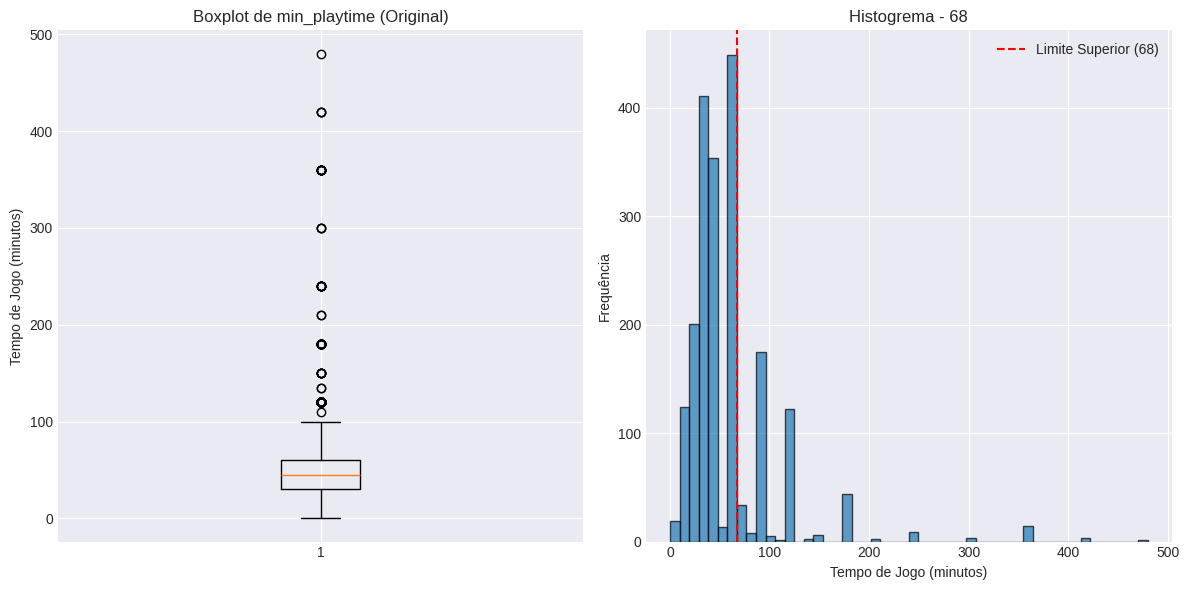

In [ ]:
# Boxplot dos Outlines
time_columns = [col for col in df.columns if 'time' in col.lower() or 'playtime' in  col.lower()]
if time_columns:
  time_col =  time_columns[0]
  plt.figure(figsize=(12, 6))

  plt.subplot(1, 2, 1)
  plt.boxplot(df[time_col].dropna())
  plt.title(f"Boxplot de {time_col} (Original)")
  plt.ylabel('Tempo de Jogo (minutos)')

    # Calculando IQR
  Q1 = df[time_col].quantile(0.25)
  Q3 = df[time_col].quantile(0.50)
  IQR = Q3 - Q1

  limite_inferior =  Q1 - 1.5 * IQR
  limite_superior =  Q3 + 1.5 * IQR

  # Filtrando os outliers
  outliers = df[(df[time_col] < limite_inferior) | (df[time_col] > limite_superior)]

  print(f"\n4. Análise de Outlines em {time_col}:")
  print(f"    Q1 (25%): {Q1:.2f}")
  print(f"    Q3 (75%): {Q3:.2f}")
  print(f"    IQR: {IQR:.2f}")
  print(f"    Limite Inferior: {limite_inferior:.2f}")
  print(f"    Limite Superior: {limite_superior:.2f}")
  print(f"    Quantidade de Outliers: {len(outliers)} jogos")

  plt.subplot(1, 2, 2)
  plt.hist(df[time_col].dropna(), bins=50, alpha=0.7, edgecolor='black')
  plt.axvline(limite_superior, color='red', linestyle='--', label=f'Limite Superior ({limite_superior:.0f})')
  plt.title(f"Histogrema - {limite_superior:.0f}")
  plt.xlabel('Tempo de Jogo (minutos)')
  plt.ylabel('Frequência')
  plt.legend()

  plt.tight_layout()
  plt.show()
else:
  print("!Coluna de tempo de jogo não encontrada!")

----------------------------------
**Visualização e Transformação**
----------------------------------

1-2. Análise da ditribuição de'avg_rating:
     Skewness: 0.567
     A distribuição é ASSIMÉTRICA POSITIVA (cauda á direita)


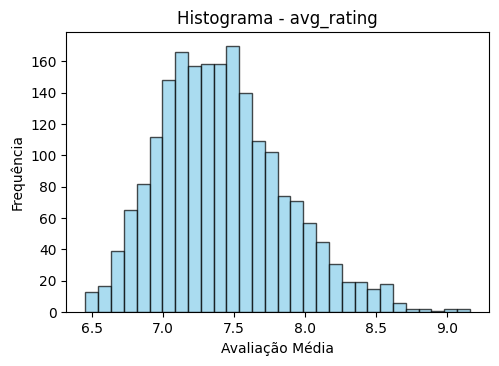

In [4]:
rating_columns = [col for col in df.columns if 'rating' in col.lower() or 'score' in  col.lower()]
if rating_columns:
    rating_col = rating_columns[0]
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 2, 1)
    plt.hist(df[rating_col].dropna(), bins=30, alpha=0.7, edgecolor='black', color='skyblue')
    plt.title(f'Histograma - {rating_col}')
    plt.xlabel('Avaliação Média')
    plt.ylabel('Frequência')

    skewness = df[rating_col].skew()
    print(f"1-2. Análise da ditribuição de'{rating_col}:")
    print(f"     Skewness: {skewness:.3f}")
    if skewness > 0.5:
      print("     A distribuição é ASSIMÉTRICA POSITIVA (cauda á direita)")
    elif skewness < -0.5:
      print("     A distribuição é ASSIMÉTRICA NEGATIVA (cauda á esquerda)")
    else:
      print("     A distribuição é SIMÉTRICA")
else:
    plt.figure(figsize=(12, 8))
    print("1-2. Coluna de rating não encontrada!")


3-4. Comparação antes/depois da transformação logarítmica:
     Skewness original: 3.487
     Skewness pós-log: -0.067
     A transformação logarítmica reduziu a assimetria,
     tornando a distribuição mais próxima da normal.


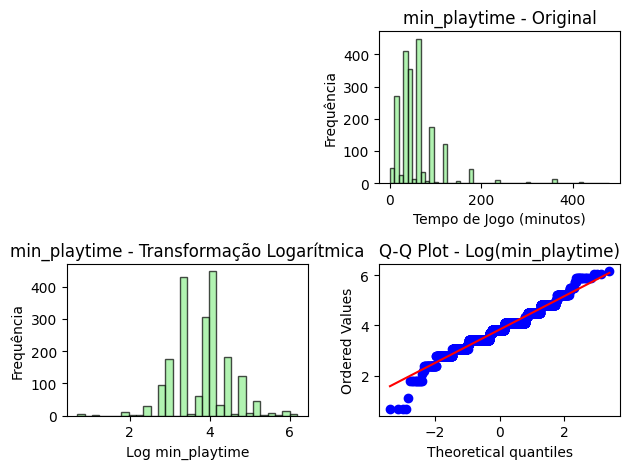

In [5]:
time_columns = [col for col in df.columns if 'time' in col.lower() or 'playtime' in  col.lower()]
if time_columns:
    time_col = time_columns[0]

    time_clean = df[time_col].replace(0, np.nan).dropna()
    df[f'log_{time_col}'] = np.log1p(df[time_col].replace(0, 1))

    plt.subplot(2, 2, 2)
    plt.hist(time_clean, bins=50, alpha=0.7,edgecolor='black', color='lightgreen')
    plt.title(f"{time_col} - Original")
    plt.xlabel('Tempo de Jogo (minutos)')
    plt.ylabel('Frequência')

    plt.subplot(2, 2, 3)
    plt.hist(df[f'log_{time_col}'].dropna(), bins=30, alpha=0.7, edgecolor='black', color='lightgreen')
    plt.title(f"{time_col} - Transformação Logarítmica")
    plt.xlabel(f'Log {time_col}')
    plt.ylabel('Frequência')

    print(f"\n3-4. Comparação antes/depois da transformação logarítmica:")
    print(f"     Skewness original: {time_clean.skew():.3f}")
    print(f"     Skewness pós-log: {df[f'log_{time_col}'].skew():.3f}")
    print("     A transformação logarítmica reduziu a assimetria,")
    print("     tornando a distribuição mais próxima da normal.")

    plt.subplot(2, 2, 4)
    stats.probplot(df[f'log_{time_col}'].dropna(), dist="norm", plot=plt)
    plt.title(f'Q-Q Plot - Log({time_col})')

    plt.tight_layout()
    plt.show()
else:
    print("3-4. Coluna de tempo não encontrada para transformação logarítmica")


1-2. Análise visual da correlação min_players vs max_players:
     Correlação calculada: 0.099
     Visualmente, observa-se uma tendência positiva forte:
     jogos com mais jogadores mínimos tendem a ter mais jogadores máximos.


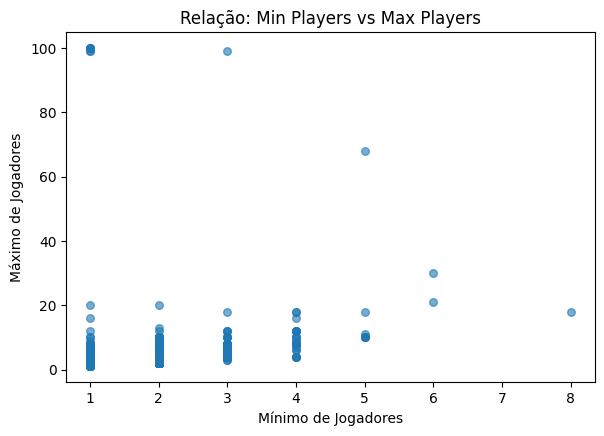

In [26]:
if 'min_players' in df.columns and 'max_players' in df.columns:
    plt.figure(figsize=(15, 10))

    plt.subplot(2, 2, 1)
    plt.scatter(df['min_players'], df['max_players'], alpha=0.6, s=30)
    plt.xlabel('Mínimo de Jogadores')
    plt.ylabel('Máximo de Jogadores')
    plt.title('Relação: Min Players vs Max Players')

    correlacao_players = df['min_players'].corr(df['max_players'])
    print(f"1-2. Análise visual da correlação min_players vs max_players:")
    print(f"     Correlação calculada: {correlacao_players:.3f}")
    print("     Visualmente, observa-se uma tendência positiva forte:")
    print("     jogos com mais jogadores mínimos tendem a ter mais jogadores máximos.")

1. Coluna de data identificada: 'release_year'
2. Coluna 'Decada' criada com sucesso

3. Distribuição de jogos por década:
   0s: 3 jogos
   1470s: 1 jogos
   1580s: 1 jogos
   1630s: 1 jogos
   1800s: 1 jogos
   1810s: 1 jogos
   1850s: 1 jogos
   1870s: 1 jogos
   1920s: 1 jogos
   1950s: 1 jogos
   1960s: 2 jogos
   1970s: 9 jogos
   1980s: 25 jogos
   1990s: 74 jogos
   2000s: 280 jogos
   2010s: 1031 jogos
   2020s: 567 jogos


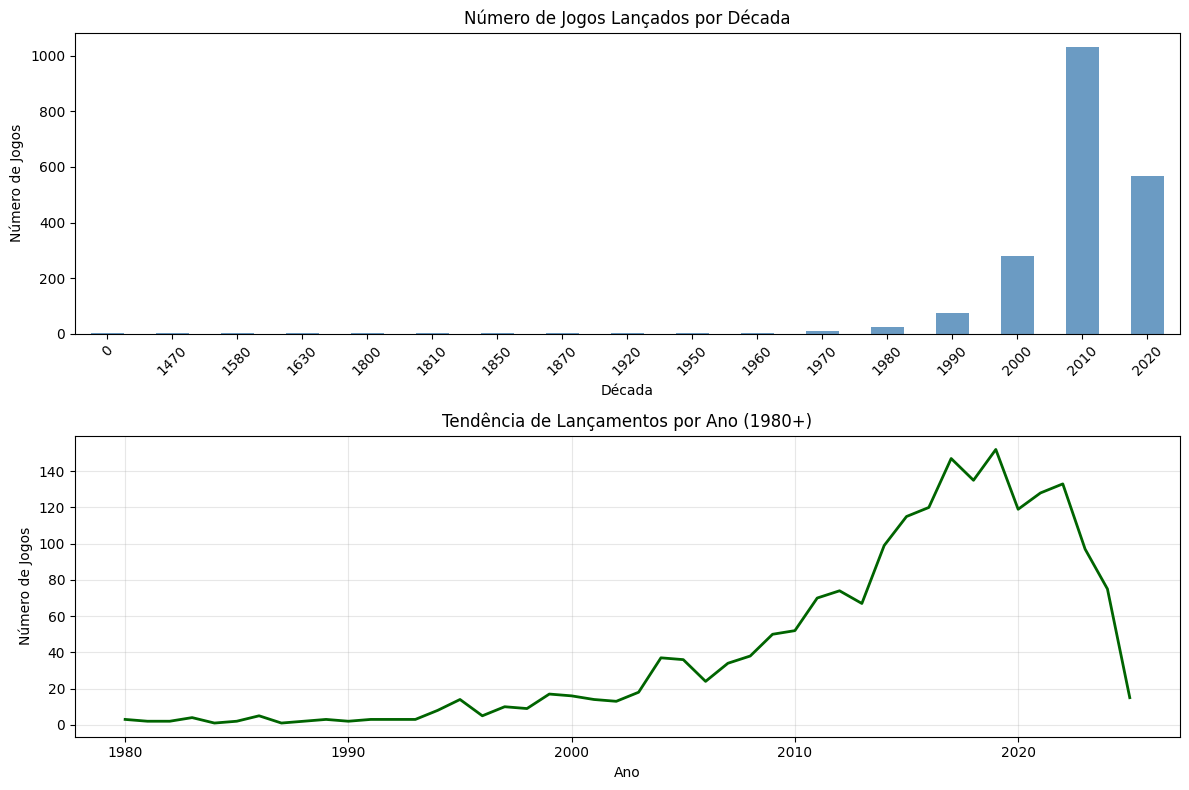

 Década com maior número de lançamentos: 2010s
 Quantidade de jogos lançados: 1031 jogos
 Observação: Há uma tendência crescente de produção de jogos
  de tabuleiro nas últimas décadas, possivelmente devido ao
  renascimento dos board games modernos.


In [28]:
year_columns = [col for col in df.columns if 'year' in col.lower() or 'date' in col.lower()]
if year_columns:
    year_col = year_columns[0]
    print(f"1. Coluna de data identificada: '{year_col}'")

    # 2. Criando coluna 'Decada'
    df['Decada'] = (df[year_col] // 10) * 10
    print("2. Coluna 'Decada' criada com sucesso")

    # 3. Contagem de jogos por década
    jogos_por_decada = df['Decada'].value_counts().sort_index()

    print("\n3. Distribuição de jogos por década:")
    for decada, quantidade in jogos_por_decada.items():
        if not pd.isna(decada):
            print(f"   {int(decada)}s: {quantidade} jogos")

    # Visualização da tendência temporal
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 1, 1)
    jogos_por_decada.plot(kind='bar', color='steelblue', alpha=0.8)
    plt.title('Número de Jogos Lançados por Década')
    plt.xlabel('Década')
    plt.ylabel('Número de Jogos')
    plt.xticks(rotation=45)

    plt.subplot(2, 1, 2)
    # Análise por ano para ver tendência mais detalhada
    jogos_por_ano = df[year_col].value_counts().sort_index()
    anos_recentes = jogos_por_ano[jogos_por_ano.index >= 1980]
    anos_recentes.plot(kind='line', color='darkgreen', linewidth=2)
    plt.title('Tendência de Lançamentos por Ano (1980+)')
    plt.xlabel('Ano')
    plt.ylabel('Número de Jogos')
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # 4. Resposta sobre a década com mais lançamentos
    decada_max = jogos_por_decada.idxmax()
    quantidade_max = jogos_por_decada.max()

    print(f" Década com maior número de lançamentos: {int(decada_max)}s")
    print(f" Quantidade de jogos lançados: {quantidade_max} jogos")
    print(" Observação: Há uma tendência crescente de produção de jogos")
    print("  de tabuleiro nas últimas décadas, possivelmente devido ao")
    print("  renascimento dos board games modernos.")

else:
    print(" Coluna de ano de publicação não encontrada no dataset")